##  **Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### **Objective**

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

### **Data Dictionary:**

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Importing all approprate Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [3]:
#loading my dataset
df_camp = pd.read_csv(r"C:\Users\kzzyg\Downloads\Loan_Modelling.csv")

In [4]:
df_camp

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


* The Experience column in my data have -3 in some which is not posible to have -3 experience

### **Data Exploration**

In [5]:
#checking my dataset full information details
df_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#Getting aritmeric calculation of all my numeric data
df_camp.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* From this calculate we can see the average Age is 11.463166
* The minimum age in my dataset is 23.0 and the maximum age is 67 
* Looking at the annual income of customer it shows that average income the customer get is 73.774200 
  which 25% of customers is geting 39.0 and the 50% half is getting 64.0
* The maximum annual income of customer is 224 while the minimum income is 8.0 which is very lower than the maximum income

In [7]:
#checking for missing values and the total number of missing values in my dataset
print (df_camp.isnull().sum())
print ('='*40)
print ('The total number of missing values: ', df_camp.isnull().sum().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
The total number of missing values:  0


In [8]:
#To checking for duplicated values in my dataset
print (df_camp.duplicated())
print ('='*40)
print ('The Total number of duplicated values: ', df_camp.duplicated().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool
The Total number of duplicated values:  0


In [8]:
#To get the total number of rows and columns in my dataset
df_camp.shape

(5000, 14)

### Visualising Experience with -1, -2, -3

In [13]:
#visualizing Experience Column to iterate over -1,-2,-3 and print
for neg_value in [-1, -2, -3]:
    print(df_camp[df_camp['Experience'] == neg_value])
    print('='*100)

        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
89      90   25          -1     113    94303       4   2.30          3   
226    227   24          -1      39    94085       2   1.70          2   
524    525   24          -1      75    93014       4   0.20          1   
536    537   25          -1      43    92173       3   2.40          2   
540    541   25          -1     109    94010       4   2.30          3   
576    577   25          -1      48    92870       3   0.30          3   
583    584   24          -1      38    95045       2   1.70          2   
649    650   25          -1      82    92677       4   2.10          3   
670    671   23          -1      61    92374       4   2.60          1   
686    687   24          -1      38    92612       4   0.60          2   
909    910   23          -1     149    91709       1   6.33          1   
1173  1174   24          -1      35    94305       2   1.70          2   
1428  1429   25          -1      21   

In [41]:
# replacing -3, -2, -1 experience with 0
df_camp['Experience'].replace([-1, -2, -3],[ 0, 0, 0], inplace=True)

### Data Visualization

Text(0.5, 1.0, 'Histogram of Age')

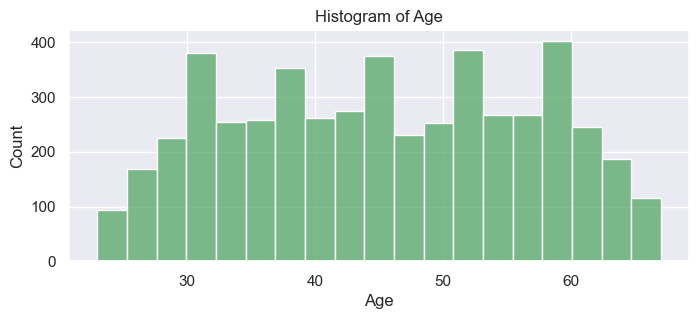

In [27]:
#To set my all my histogram figure size
sns.set(rc ={'figure.figsize':(8,3)})
#For histogram plot, color and title on the top
sns.histplot(data = df_camp, x ='Age', color = 'g')
plt.title('Histogram of Age')

The Age histogram show that age 30 increase to 200 and drop 250 while it increase at age 38 to 350 which signify that age increse and decrease forming some kind of embalance bell shape

Text(0.5, 1.0, 'Histogram of ID')

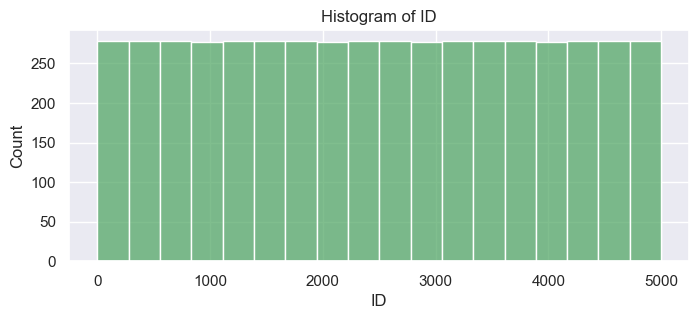

In [29]:
#For histogram plot, color and title on the top
sns.histplot(data= df_camp, x = 'ID', color ='g')
plt.title('Histogram of ID')

The Id histogram all looks constant at the same count and level nno increase or the decrease

Text(0.5, 1.0, 'Histogram of Experience')

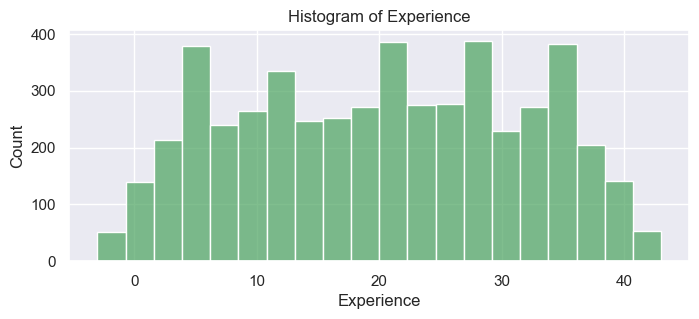

In [30]:
#For histogram plot, color and title on the top
sns.histplot(data = df_camp, x = 'Experience', color= 'g')
plt.title('Histogram of Experience')

The Experience histogram show some increase in experience from 0 to count 380 and decrease to count 220 with a  gradual increse and decrease again which forming some kind of embalance bell shape

Text(0.5, 1.0, 'Histogram of income')

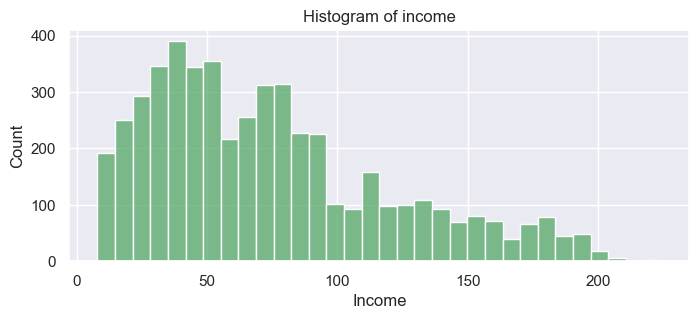

In [31]:
#For histogram plot, color and title on the top
sns.histplot(data= df_camp, x= 'Income', color='g')
plt.title('Histogram of income')

The income distribution appear to be skewed to the left with a high decrease for income of 90 which means about 200 to 400 customer is earning annual income of between 0 to 90 while about 100 to 20 customer earn between 100 to 200 annual income

Text(0.5, 1.0, 'Histogram of ZIPCode')

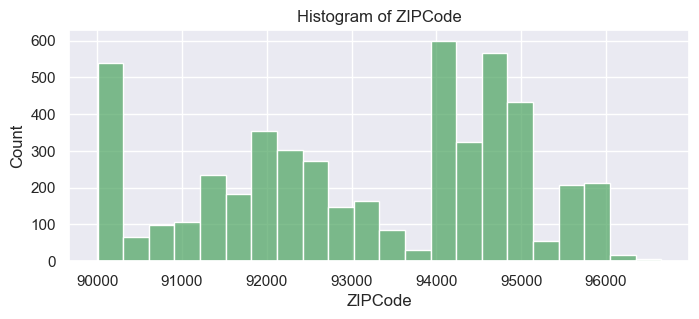

In [32]:
#For histogram plot, color and title on the top
sns.histplot(data= df_camp, x= 'ZIPCode', color= 'g')
plt.title('Histogram of ZIPCode')

The zipcode histogram distribution appear to be much higher to 550 for 90000 zipcode with a sharp decline from the remaning zipcode and shows a relatively skewed to thhe right distribution with unstabel increase and decrease in the zipcode count

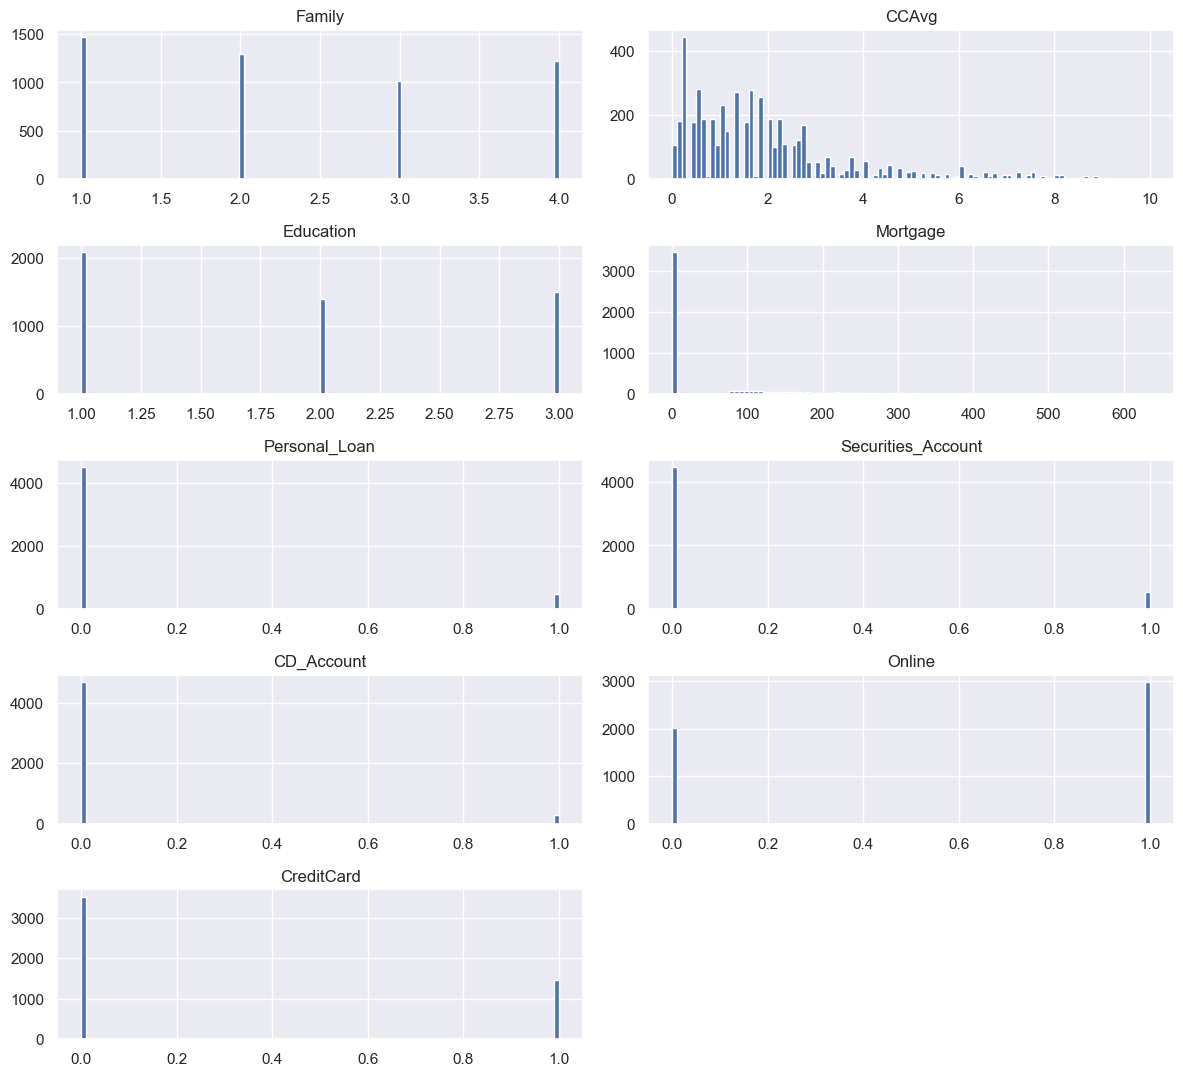

In [34]:
#using list and slicing to specify the column to plot my histogram plot which start from 'Family' to 'CreditCard'
df_lis = list(df_camp)[5:]
#seting my paramiter like bins, figure size and layout
df_camp[df_lis].hist(stacked= False, bins= 100, figsize= (12,30), layout= (14,2))
plt.tight_layout()

the 

###  Performing Correlation

Index([], dtype='object')


<Axes: >

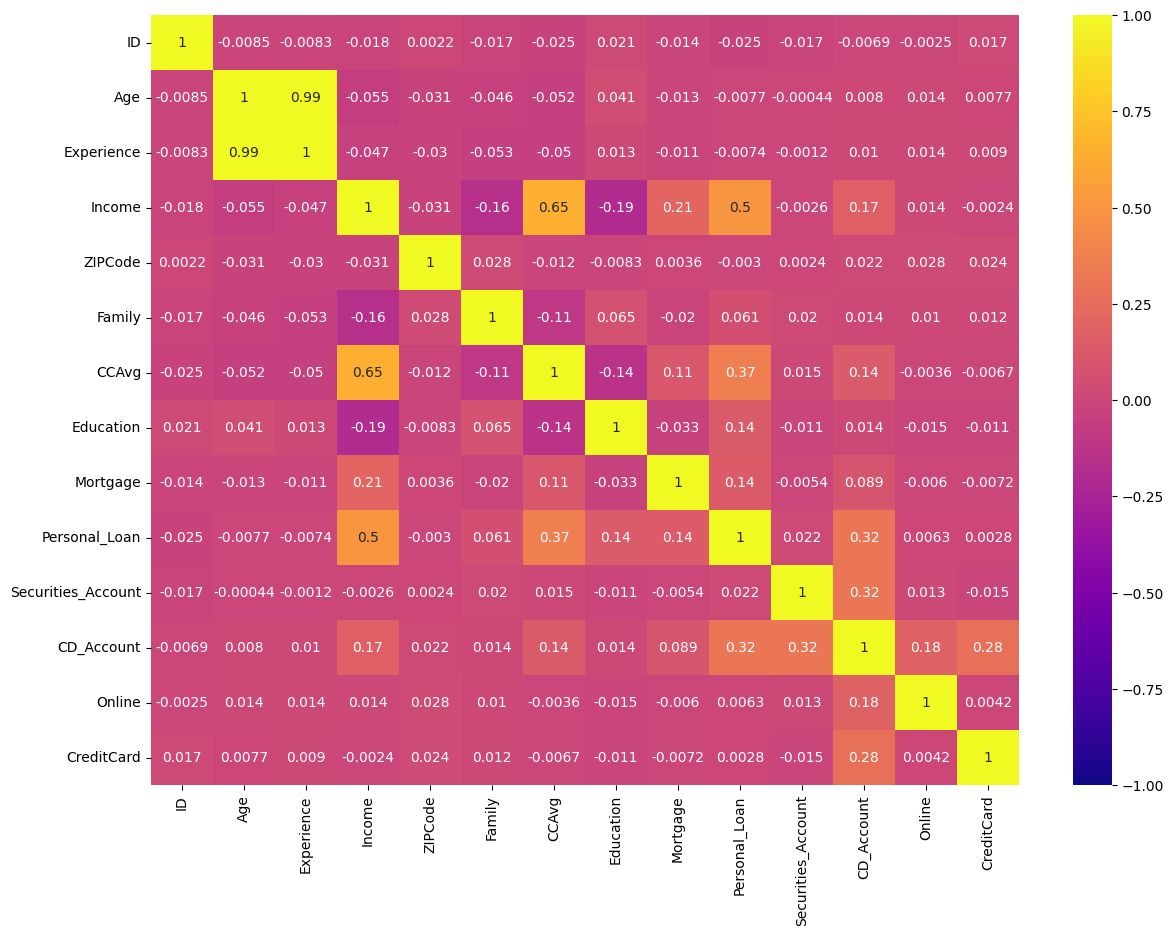

In [9]:
#To select all numeric columns
num_col = df_camp.select_dtypes(include = 'number')
#Ploting for correlation of columns and tuning the figure size 
corr_data= num_col.corr()
plt.figure(figsize = (14,10))
sns.heatmap(corr_data, vmin = -1, vmax = 1, annot = True, cmap = 'plasma')

The Age and Experience is highly correlated with 0.99 each 

In [48]:
df_camp.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Building Model 

### Performing Normalization

In [45]:
X = df_camp.drop(['Personal_Loan'], axis= 1)
y =df_camp['Personal_Loan']

In [49]:
#spliting my data into 20 % and 80 % to build my model by seting my test size to 20%
x_train, x_test, y_train, y_test, = train_test_split(X, y, test_size= 0.2, random_state= 0, stratify = y)

In [52]:
#df_camp.columns
num_data = [ 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
scaler = MinMaxScaler()
train_data= x_train.copy
test_data = x_test.copy
train_data[num_data]= scaler.fit_transform(x_train[num_data])
test_data[num_data]= scaler.transform(x_test[num_data])

TypeError: 'method' object does not support item assignment

In [43]:
#
# Lin_reg_mod = LinearRegression()
# Lin_reg_mod.fit(train_data,y_train)

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
model_performance_regression(Lin_reg_mod, train_data, y_train)

In [ ]:
model_performance_regression(Lin_reg_mod, test_data, y_test)

In [ ]:
Lin_reg_mod.predict(test_data)

In [ ]:
Lin_reg_mod.coef_

In [34]:
def adj_r2_score(predictors, targets, predictions):
    r2= r2_score(targets, predictions)
    n= predictors.shape[0]
    k= predictors.shape[1]
    return 1 - ((1 - r2)* (n -1) / (n - k - 1))

def mape_score(targets,predictions):
    return np.mean(np.abs(targets - predictions) / targets)* 100

def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2= r2_score(target, pred)
    adjr2= adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)
    
    df_perf = pd.DataFrame(
        {
            'RMSE':rmse,
            'MAE': mae,
            'R-squred': r2,
            'Adj. R-squred': adjr2,
            'MAPE': mape
        },
        index= [0],
    )
    return df_perf